<a href="https://colab.research.google.com/github/babyraggge/notebooks/blob/master/Neural_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашка 
---------------------------------------

tldr:
    
* Выбрать архитектуру из рассказанных NST, pix2pix, CycleGAN$^1$
* Подберите к ней задачу, чтобы она вам нравилась
* Подберите еще одну задачу, которая уже решена (если не NST)
* Повторите решение, которое уже есть$^2$ (если не NST)
* Решите свою задачу

---------------------------------------
1. Расположены в порядке возрастания сложности и крутизны
2. Поверьте если вы сделаете этот пункт следующий будет в *разы* легче

## Если вы выбрали Neural Style Transfer
---------------------------------------
Тут все довольно просто на первый и на второй взгляд. Поэтому недосотаточно просто написать свою функцию потерь и сдать ноутбук. Если вы хотите приличных баллов, то у вас есть две опции:


1. Вы разделяете картинку на две части и переносите на них разные стили. <p><span style="color:red">Нельзя просто взять и два раза применить обычную архитектуру сначала к одной чати картинки, а потом к другой.</span></p> От вас ожидается, что вы отдадите нейросети два картинки стиля и она внутри себя(скорее внутри лосс функции) разделит выходную картинку на две части и к одной части применит один стиль, а к другой - второй. 

2. Вы переносите *одновременно* два стиля на одну картинку контента.
<p><span style="color:red">Нельзя просто взять и два раза применить обычную архитектуру сначала с одним стилем, а потом с другим.</span></p>
От вас ожидается, что вы модифицируете модель(скорее лосс модели) для того, чтобы два стиля учитывались с разными весами. 

## Если вы выбрали pix2pix
---------------------------------------------
Здесь от вас ожидается, что вы реализуете свою архитектуру для pix2pix модели. Пожалуйста не копируйте код из открытых репозиториев. Этот факт очень легко обнаружить. Перед тем, как приступить проверьте, что обе задачи, которые вы выбрали влезают на вашу видеокарту или на карту Google Colab. Если они не влезают, но вам все равно очень хочется, то вы можете израсходовать все безплатные триалы облаков(Google, Amazon, .. etc) во вселенной. 

## Если вы выбрали CycleGAN
--------------------------------------------
Здесь от вас ожидается, что вы реализуете свою архитектуру для CycleGAN модели. Пожалуйста не копируйте код из открытых репозиториев. Этот факт очень легко обнаружить. Перед тем, как приступить проверьте, что обе задачи, которые вы выбрали влезают на вашу видеокарту или на карту Google Colab. CycleGAN в этом смысле хуже, чем pix2pix, он ест больше памяти. Если они не влезают, но вам все равно очень хочется, то вы можете израсходовать все беcплатные триалы облаков(Google, Amazon, .. etc) во вселенной. 

## Remarks:
-----------------------------------------

* Это задание нужно для того, чтобы вы наступили на все грабли, что есть. Узнали об их существовании и научились обходить. Посмотрели на неработающие модели и поняли, что все тлен. Изгуглили весь интернет и в конце заставили это все работать. Поверьте, оно того стиот. Не откладывайте это задание на ночь перед сдачей, так как весь смысл \*пуф\* улетучится.

* У вас два союзника в этой борьбе:
    1. Оригинальная статья, те психи, что ее писала как то заставили свою модель работать. Их мысли, которыми они спроводили свое детище, позволят вам написать свой вариант алгоритма. 
    2. Гугл, он знает ответы на почти все ваши вопросы, но у него есть две ипостаси одна простая в обещении и вы все ее занаете(русскоязычная), а есть еще одна, которая кусается, но знает больше(англоязычная). Если не знаете языва - учите на ходу :)
    
* На самом деле у вас есть еще один союзник, это ментор проекта(или лектор или семинарист). Его ресурсом нужно пользоваться в ситуации, в которой вы не можете(занчит попытались и не вышло) найти ответов, используя Гугл и статью.

* Сдавать это все нужно следующим образом. Код вы кидаете на github и отправляете ссылку туда, куда вам сказали(в телеграм, степик или еще куда-то)

#Neural Style Transfer

  Выберем изображения для переноса стиля. На изображение будем пересноить два стиля. В качестве входного изображени будем использовать content изображение.

In [45]:
!wget https://i.pinimg.com/originals/87/6a/dd/876add55b4609c042ecf26fdf1ba6ffc.jpg # content
!wget https://www.culturepartnership.eu/upload/news/5a8379cdbddb1.jpg # style 1
!wget https://artdoart.com/uploads/news/4441_d4ca5a8239e8c49b9.jpg # style 2

--2021-01-09 18:24:11--  https://i.pinimg.com/originals/87/6a/dd/876add55b4609c042ecf26fdf1ba6ffc.jpg
Resolving i.pinimg.com (i.pinimg.com)... 151.101.188.84, 2a04:4e42:a::84
Connecting to i.pinimg.com (i.pinimg.com)|151.101.188.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261810 (256K) [image/jpeg]
Saving to: ‘876add55b4609c042ecf26fdf1ba6ffc.jpg’

876add55b4609c042ec 100%[===================>] 255.67K  --.-KB/s    in 0.05s   

2021-01-09 18:24:11 (4.55 MB/s) - ‘876add55b4609c042ecf26fdf1ba6ffc.jpg’ saved [261810/261810]

--2021-01-09 18:24:11--  https://www.culturepartnership.eu/upload/news/5a8379cdbddb1.jpg
Resolving www.culturepartnership.eu (www.culturepartnership.eu)... 89.184.77.13
Connecting to www.culturepartnership.eu (www.culturepartnership.eu)|89.184.77.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 452870 (442K) [image/jpeg]
Saving to: ‘5a8379cdbddb1.jpg.1’

5a8379cdbddb1.jpg.1 100%[===================>] 442.26K

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models, transforms
import torch.optim as optim

import numpy as np

In [34]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [46]:
style1_path = '/content/5a8379cdbddb1.jpg'
style2_path = '4441_d4ca5a8239e8c49b9.jpg.1'
content_path = '/content/876add55b4609c042ecf26fdf1ba6ffc.jpg'

In [5]:
from PIL import Image

size = (256, 256)

loader = transforms.Compose(
    [
     transforms.Resize((256, 256)),
     transforms.ToTensor(),
     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ]
)

# Image loader with transformation
def imload(img_path, loader=loader) -> torch.tensor:
  img = Image.open(img_path)
  img = loader(img).unsqueeze(0)
  return img

# Convert form tenosr to numpy array with shape (255, 255, 3)
def imconvert(img_tensor) -> np.array:
  img = img_tensor.cpu().clone().detach()
  img = img.numpy().squeeze(0)
  img = img.transpose(1,2,0)
  img = img * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
  return img

In [6]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
from skimage.io import imread

def imgshow(content, style1, style2):
  plt.figure(figsize=(18, 6))

  plt.subplot(1, 3, 1)
  plt.imshow(imconvert(content))
  plt.title('Content')
  plt.axis('off')

  plt.subplot(1, 3, 2)
  plt.imshow(imconvert(style1))
  plt.title('Style 1')
  plt.axis('off')

  plt.subplot(1, 3, 3)
  plt.imshow(imconvert(style2))
  plt.title('Style 2')
  plt.axis('off')

  plt.show();

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


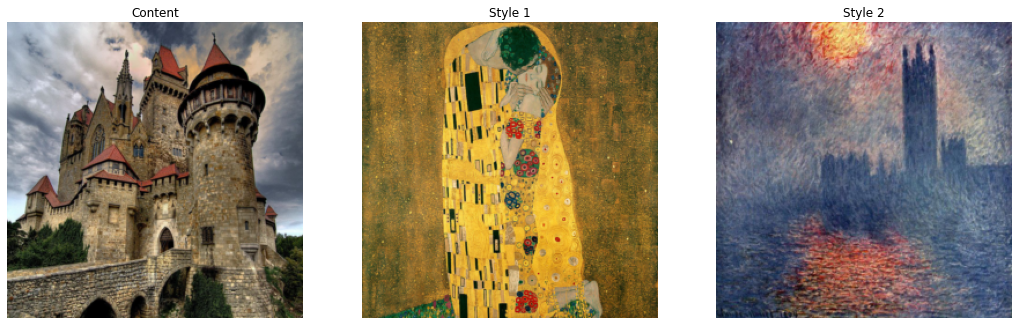

In [48]:
style1 = imload(style1_path)
style2 = imload(style2_path)
content = imload(content_path)

imgshow(content, style1, style2);

Лосс будет выглядить следующим образом:
  **Loss = ContentLoss + w * (Style1Loss + Style2Loss)**
  Где w веса для карт признаков на разных слоях. По мотивам *https://arxiv.org/abs/1811.07260*



In [27]:
# Calculate a content loss
def content_loss(input, target):
  return F.mse_loss(input, target)

# Calculate a normed Gram matrix
def gram_matrix(input):
  _B, C, S, W = input.size()
  a = input.view(C, S*W)
  G = torch.mm(a, a.t())
  return G / (C*S*W)

# Mask -> [C, W, H]
# Calculate a style loss
def style_loss(input, target, mask=None):
  if mask is not None:
    mask = transforms.Resize(input.size()[2:])(mask)
    input = input * mask

  G = gram_matrix(input)
  GG = gram_matrix(target)

  return F.mse_loss(G, GG)

# Calculate a total loss
def CS_loss(c_loss, s_loss, alpha=1, betta=1e7):
  return alpha*c_loss + betta*s_loss

In [9]:
class mod_VGG(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = {
        '0': 'conv1_1',
        '5': 'conv2_1', 
        '10': 'conv3_1', 
        '19': 'conv4_1',
        '21': 'conv4_2',  ## content representation
        '28': 'conv5_1'}
    self.model = models.vgg19(pretrained=True).features
    for param in self.model.parameters():
      param.requires_grad_(False)

  def forward(self, x):
    features = {}
    x = x.to(device)

    for name, layer in self.model._modules.items():
        x = layer(x)
        if name in self.layers:
            features[self.layers[name]] = x
            
    return features

In [21]:
# Train loop
def train(model, opt, steps, input, content, style1, style2, 
          style_layers_weights=[1, 0.75, 0.2, 0.2, 0.2], mask=None):
  total_loss = 0
  history = []

  content_features = model(content)
  style1_features = model(style1)
  style2_features = model(style2)
  mask1 = mask.to(device)
  mask2 = inverse_mask(mask).to(device)
 
  for step in range(steps):
    input_features = model(input)

    c_L = content_loss(input_features['conv4_2'], content_features['conv4_2'])

    s_L = 0
    
    for input_key, style1_key, style2_key, w in zip(input_features,
                                       style1_features, 
                                       style2_features,
                                       style_layers_weights):
    
      s_L += style_loss(input_features[input_key], 
                        style1_features[style1_key], 
                        mask=mask1)
      
      s_L += style_loss(input_features[input_key], 
                        style2_features[style2_key], 
                        mask=mask2)
      s_L *= w

    total_loss = CS_loss(c_L, s_L)
    opt.zero_grad()
    total_loss.backward()
    opt.step()

    history.append(total_loss)

    del input_features
    torch.cuda.empty_cache()

    if step % 200 == 0:
      clear_output(wait=True)
      plt.imshow(imconvert(input))
      plt.title(f'Step: {step}, total loss: {total_loss}')
      plt.axis('off')
      plt.show()

  return history
          

In [22]:
def inverse_mask(mask):
  mask = torch.where(mask > 0., 0., 1.)
  return mask

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


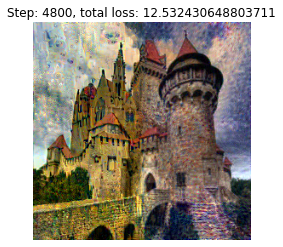

In [49]:
input = content.clone().requires_grad_(True)

# Create the mask: on the left one style on the right another
mask = torch.ones((256,256)).unsqueeze(0)
mask[:, :, 128:] = 0

opt = optim.Adam([input])
model = mod_VGG().cuda()
steps = 5000

# Train model
history = train(model, opt, steps, input, content, style1, style2, mask=mask)

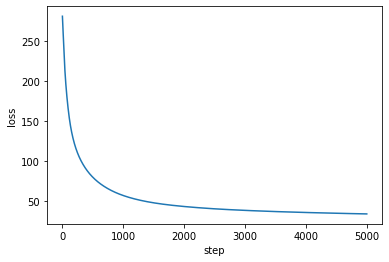

In [29]:
plt.plot(range(steps), history);
plt.xlabel('step')
plt.ylabel('loss')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


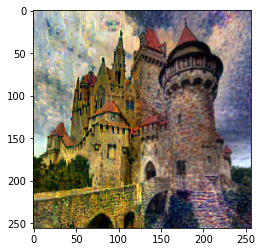

In [51]:
plt.imshow(imconvert(input));